# Testing CUDA

In [1]:
import torch
  
print(f"Is CUDA supported by this system?{torch.cuda.is_available()}")
print(f"CUDA version: {torch.version.cuda}")
  
# Storing ID of current CUDA device
cuda_id = torch.cuda.current_device()
print(f"ID of current CUDA device:{torch.cuda.current_device()}")
        
print(f"Name of current CUDA device:{torch.cuda.get_device_name(cuda_id)}")

Is CUDA supported by this system?True
CUDA version: 11.3
ID of current CUDA device:0
Name of current CUDA device:NVIDIA GeForce GTX 1660 Ti with Max-Q Design


In [2]:
cuda = torch.device('cuda:0')     # Default CUDA device
t = torch.tensor([[[3,4],[5,2]],[[8,7],[16,95]],[[8,7],[16,95]],[[8,7],[16,95]],[[8,7],[16,95]]],device=cuda)

# **Linear Regression**

## Introduction

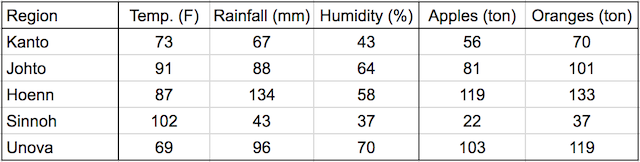
* yield_apple  = w11 * temp + w12 * rainfall + w13 * humidity + b1
* yield_orange = w21 * temp + w22 * rainfall + w23 * humidity + b2
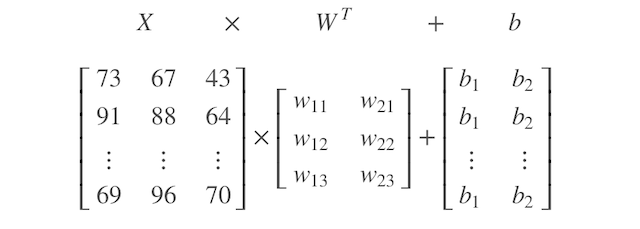

In [3]:
import numpy as np
import torch

def model(x):
    return x @ w.t() + b

inputs = np.array([[73, 67, 43], 
                   [91, 88, 64], 
                   [87, 134, 58], 
                   [102, 43, 37], 
                   [69, 96, 70]], dtype='float32')

targets = np.array([[56, 70], 
                    [81, 101], 
                    [119, 133], 
                    [22, 37], 
                    [103, 119]], dtype='float32')

inputs = torch.from_numpy(inputs)
targets = torch.from_numpy(targets)
w = torch.randn(2,3, requires_grad = True) # random weights matrix
b = torch.randn(2, requires_grad = True) # random b values
predictions = model(inputs)
print(predictions)
print(targets) # there is a big difference

tensor([[  83.5692, -207.1859],
        [ 116.6228, -275.6804],
        [ 131.1942, -348.6197],
        [  69.9329, -180.5980],
        [ 123.7469, -279.1261]], grad_fn=<AddBackward0>)
tensor([[ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.]])


In [4]:
def mse(tensor1, tensor2): # function for calculate the MSE
    diff = tensor1 - tensor2
    return torch.sum(diff * diff) / diff.numel()

loss = mse(predictions, targets)
print(loss)

tensor(66143.6719, grad_fn=<DivBackward0>)


In [5]:
loss.backward() # computing gradients of w 

with torch.no_grad():
    w -= w.grad * 1e-5
    b -= b.grad * 1e-5
    w.grad.zero_() # if this method doesn't use before the new .backward() method, new gradient values add to old .grad() values and unwanted values are founded 
    b.grad.zero_()
    
predictions = model(inputs)
print(mse(predictions, targets))
print(predictions)
print(targets)

tensor(44842.5859, grad_fn=<DivBackward0>)
tensor([[  79.6582, -155.3114],
        [ 111.4981, -207.4711],
        [ 125.2778, -267.7050],
        [  65.8899, -129.3136],
        [ 118.9187, -213.5245]], grad_fn=<AddBackward0>)
tensor([[ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.]])


## Training with multiply epochs

In [6]:
for i in range(100):
    predictions= model(inputs)
    
    loss = mse(predictions, targets)
    
    loss.backward()
    with torch.no_grad():
        w -= w.grad * 1e-5
        b -= b.grad * 1e-5
        w.grad.zero_()
        b.grad.zero_()
        
print(loss)
print(predictions)
print(targets)

tensor(253.4891, grad_fn=<DivBackward0>)
tensor([[ 59.6184,  77.2813],
        [ 86.1721, 101.5520],
        [105.7329, 119.7487],
        [ 35.0362,  75.6350],
        [100.7838,  98.4429]], grad_fn=<AddBackward0>)
tensor([[ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.]])


## Linear regression using PyTorch built-ins

In [7]:
import torch.nn as nn

In [8]:
inputs = np.array([[73, 67, 43], 
                   [91, 88, 64], 
                   [87, 134, 58], 
                   [102, 43, 37], 
                   [69, 96, 70], 
                   [74, 66, 43], 
                   [91, 87, 65], 
                   [88, 134, 59], 
                   [101, 44, 37], 
                   [68, 96, 71], 
                   [73, 66, 44], 
                   [92, 87, 64], 
                   [87, 135, 57], 
                   [103, 43, 36], 
                   [68, 97, 70]], 
                  dtype='float32')

targets = np.array([[56, 70], 
                    [81, 101], 
                    [119, 133], 
                    [22, 37], 
                    [103, 119],
                    [57, 69], 
                    [80, 102], 
                    [118, 132], 
                    [21, 38], 
                    [104, 118], 
                    [57, 69], 
                    [82, 100], 
                    [118, 134], 
                    [20, 38], 
                    [102, 120]], 
                   dtype='float32')

inputs = torch.from_numpy(inputs)
targets = torch.from_numpy(targets)

In [9]:
from torch.utils.data import TensorDataset

train_ds = TensorDataset(inputs, targets)
train_ds[0:3]

(tensor([[ 73.,  67.,  43.],
         [ 91.,  88.,  64.],
         [ 87., 134.,  58.]]),
 tensor([[ 56.,  70.],
         [ 81., 101.],
         [119., 133.]]))

In [10]:
from torch.utils.data import DataLoader

batch_size = 5
train_dl = DataLoader(train_ds, batch_size, shuffle=True)

In [11]:
model = nn.Linear(3,2)
print(model.weight)
print(model.bias)
list(model.parameters())

Parameter containing:
tensor([[-0.2706, -0.2922,  0.5431],
        [ 0.0587,  0.2946, -0.3810]], requires_grad=True)
Parameter containing:
tensor([ 0.5479, -0.2742], requires_grad=True)


[Parameter containing:
 tensor([[-0.2706, -0.2922,  0.5431],
         [ 0.0587,  0.2946, -0.3810]], requires_grad=True),
 Parameter containing:
 tensor([ 0.5479, -0.2742], requires_grad=True)]

In [12]:
predictions = model(inputs)

In [13]:
import torch.nn.functional as F

loss_fn = F.mse_loss
loss = loss_fn(predictions, targets)
print(loss)

tensor(8965.8232, grad_fn=<MseLossBackward0>)


In [14]:
optimizer = torch.optim.SGD(model.parameters(), lr=1e-5)

### Training model

In [15]:
def fit(num_epochs, train_dl, loss_fn, optimizer, model):
    
    for epoch in range(num_epochs):
        
        for xb, yb in train_dl:
            
            predictions = model(xb)
            loss = loss_fn(predictions, yb)
            loss.backward()
            optimizer.step() # Update parameters using gradients
            optimizer.zero_grad()
        
        if (epoch+1) % 10 == 0:
            print("Epoch {}/{} : loss : {}".format(epoch+1,num_epochs,loss.item()))

In [16]:
fit(100,train_dl,loss_fn,optimizer,model)

Epoch 10/100 : loss : 311.9315185546875
Epoch 20/100 : loss : 190.10116577148438
Epoch 30/100 : loss : 89.26696014404297
Epoch 40/100 : loss : 96.62709045410156
Epoch 50/100 : loss : 96.78524017333984
Epoch 60/100 : loss : 106.97119140625
Epoch 70/100 : loss : 58.595367431640625
Epoch 80/100 : loss : 74.4635238647461
Epoch 90/100 : loss : 57.107269287109375
Epoch 100/100 : loss : 49.90583419799805


In [19]:
print(model(inputs[0]),targets[0])

tensor([57.9464, 71.6049], grad_fn=<AddBackward0>) tensor([56., 70.])
